#1. Mount Google Drive


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install -U --force-reinstall tifffile imagecodecs numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 108.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tifffile
    Found existing installation: tifffile 2025.3.30
    Uninstalling tifffile-2025.3.30:
      Successfully uninstalled tifffile-2025.3.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
!ls -la /content/drive/MyDrive/dissertation/datasets/

total 6992598
-rw------- 1 root root  340216752 May 10 20:17 cyclegan_checkpoints.weights.h5
-rw------- 1 root root  340216752 May 10 20:59 cyclegan_checkpoints.weights.v2.h5
-rw------- 1 root root  191213337 May 10 18:12 dataseta.tar.gz
-rw------- 1 root root  106589230 May 10 18:54 datasetb.tar.gz
-rw------- 1 root root  132842444 May 10 22:17 finetuninnd_dataset.tar.gz
-rw------- 1 root root 6049340023 Apr 30 20:06 orthos.zip


In [ ]:
!cp /content/drive/MyDrive/dissertation/datasets/orthos.zip ./

In [ ]:
#!curl --output ./orthos.zip https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/DRLL/AI4BOUNDARIES/orthophoto/orthos.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5769M  100 5769M    0     0  12.5M      0  0:07:39  0:07:39 --:--:-- 9813k


In [ ]:
!unzip orthos.zip

Streaming output truncated to the last 5000 lines.
  inflating: masks/train/FR_28239_ortholabel_1m_512.tif  
  inflating: masks/train/AT_5352_ortholabel_1m_512.tif  
  inflating: masks/train/AT_6756_ortholabel_1m_512.tif  
  inflating: masks/train/AT_5338_ortholabel_1m_512.tif  
  inflating: masks/train/FR_55133_ortholabel_1m_512.tif  
  inflating: masks/train/AT_10104_ortholabel_1m_512.tif  
  inflating: masks/train/SE_17734_ortholabel_1m_512.tif  
  inflating: masks/train/SE_14706_ortholabel_1m_512.tif  
  inflating: masks/train/SI_1151_ortholabel_1m_512.tif  
  inflating: masks/train/AT_8548_ortholabel_1m_512.tif  
  inflating: masks/train/AT_9008_ortholabel_1m_512.tif  
  inflating: masks/train/AT_10261_ortholabel_1m_512.tif  
  inflating: masks/train/FR_40445_ortholabel_1m_512.tif  
  inflating: masks/train/AT_7562_ortholabel_1m_512.tif  
  inflating: masks/train/FR_30758_ortholabel_1m_512.tif  
  inflating: masks/train/SE_8933_ortholabel_1m_512.tif  
  inflating: masks/train/SE_2

In [ ]:
!ls -la ./images/train/ | head



total 4106520
drwxrwxr-x 2 root root 249856 Sep 30  2022 .
drwxrwxr-x 5 root root   4096 Sep 30  2022 ..
-rw-rw-r-- 1 root root 787590 Sep 19  2022 AT_10033_ortho_1m_512.tif
-rw-rw-r-- 1 root root 787590 Sep 19  2022 AT_10034_ortho_1m_512.tif
-rw-rw-r-- 1 root root 787590 Sep 19  2022 AT_10039_ortho_1m_512.tif
-rw-rw-r-- 1 root root 787590 Sep 19  2022 AT_10042_ortho_1m_512.tif
-rw-rw-r-- 1 root root 787590 Sep 19  2022 AT_10043_ortho_1m_512.tif
-rw-rw-r-- 1 root root 787590 Sep 19  2022 AT_10044_ortho_1m_512.tif
-rw-rw-r-- 1 root root 787590 Sep 19  2022 AT_10051_ortho_1m_512.tif


In [ ]:
# check GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

import os

# import libs for processing images
import imageio
import imagecodecs
from PIL import Image

# import visualizations
import matplotlib.pyplot as plt

import numpy as np # for using np arrays

# TF and co
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy


Sun May 11 17:20:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   36C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
import tifffile
import numpy as np
import imagecodecs # Ensure imagecodecs is imported if using tifffile with compressed files

def LoadAndProcessData(image_dir, mask_dir, mask_channel_index=0, mask_dtype=np.uint8, limit=100000):
    """
    Loads original images and processes corresponding multi-channel masks
    for semantic segmentation from specified directories.

    Args:
        image_dir (str): Path to the directory containing original image files.
        mask_dir (str): Path to the directory containing multi-channel mask files.
        mask_channel_index (int): The index of the channel containing the
                                  semantic segmentation labels (e.g., 0 for
                                  AI4Boundaries 'vector label'). Defaults to 0.
        mask_dtype (numpy.dtype): The target integer data type for the final
                                  mask (e.g., np.uint8, np.int64). Defaults to np.uint8.

    Returns:
        tuple: A tuple containing two lists:
            - loaded_images (list): A list of loaded original images (NumPy arrays).
            - processed_masks (list): A list of loaded and processed single-channel
                                     integer masks (NumPy arrays).
    """
    try:
        # List and sort filenames to ensure matching pairs
        image_filenames = sorted(os.listdir(image_dir))
        mask_filenames = sorted(os.listdir(mask_dir))

        # Basic check for equal number of files
        if len(image_filenames) != len(mask_filenames):
            print(f"Warning: Mismatch in file count! Images: {len(image_filenames)}, Masks: {len(mask_filenames)}")
            # Depending on requirements, you might want to raise an error here

        print(f"Found {len(image_filenames)} potential image/mask pairs.")

        loaded_images = []
        processed_masks = []
        cnt = 0

        # Iterate through the pairs using zip for safety
        for img_fname, mask_fname in zip(image_filenames, mask_filenames):
            # Optional: More robust check if names should match exactly (excluding extension)
            if img_fname == 'AT_10033_ortho_1m_512.tif' or img_fname == 'AT_10034_ortho_1m_512.tif':

              continue

            img_base = os.path.splitext(img_fname)[0]
            mask_base = os.path.splitext(mask_fname)[0]
            #if img_base != mask_base:
            #    print(f"Warning: Filenames might not correspond? Skipping pair: '{img_fname}' and '{mask_fname}'")
            #    continue

            img_full_path = os.path.join(image_dir, img_fname)
            mask_full_path = os.path.join(mask_dir, mask_fname)

            try:
                # --- Load Original Image ---
                # Using tifffile assuming images might also be TIFFs.
                # If images are standard PNG/JPG, imageio might be slightly simpler,
                # but tifffile handles various TIFF types well.
                image_data = tifffile.imread(img_full_path)
                # Note: Add any necessary preprocessing for images here (e.g., normalization) later.

                # --- Load and Process Mask ---
                # 1. Read the full multi-channel mask data
                multi_channel_mask_data = tifffile.imread(mask_full_path)

                # 2. Select the relevant channel
                if multi_channel_mask_data.ndim == 3 and multi_channel_mask_data.shape[2] > mask_channel_index:
                    raw_mask = multi_channel_mask_data[:, :, mask_channel_index]
                elif multi_channel_mask_data.ndim == 2 and mask_channel_index == 0:
                    # Handle case where mask file might already be single channel
                    print(f"  Info: Mask '{mask_fname}' is already 2D, using as is.")
                    raw_mask = multi_channel_mask_data
                else:
                    # Error if dimensions/channel index are unexpected
                    print(f"Error: Mask '{mask_fname}' has unexpected shape {multi_channel_mask_data.shape} or invalid channel index {mask_channel_index}. Skipping pair.")
                    continue # Skip this image/mask pair

                # 3. Convert the extracted mask channel to the target integer format
                final_mask = raw_mask.astype(mask_dtype)

                # Append the successfully loaded data
                loaded_images.append(image_data)
                processed_masks.append(final_mask)

                cnt += 1

                if cnt >= limit:
                  print("Reached provessing limit of ", limit)
                  break

            except FileNotFoundError:
                print(f"Error: File not found for pair. Image: '{img_full_path}', Mask: '{mask_full_path}'. Skipping.")
            except Exception as e:
                # Catch other potential errors during file reading or processing
                print(f"Error processing pair: Image='{img_fname}', Mask='{mask_fname}'. Error: {e}. Skipping.")

    except FileNotFoundError as e:
        print(f"Error: Cannot access directory. Path: {e.filename}")
        return [], [] # Return empty lists if directories aren't found
    except Exception as e:
        print(f"An unexpected error occurred in LoadAndProcessData: {e}")
        return [], [] # Return empty lists on other unexpected errors

    print(f"Successfully loaded {len(loaded_images)} image/mask pairs.")
    return loaded_images, processed_masks


In [ ]:
import numpy as np
from PIL import Image # Image processing library
import os # os might still be needed if paths were used elsewhere, but not in this func

def PreprocessData(loaded_images, processed_masks, target_shape_img, target_shape_mask):
    """
    Processes the loaded image and mask NumPy arrays.
    Resizes images and masks to target shapes and normalizes images.

    Args:
        loaded_images (list): List of NumPy arrays, each an original image (e.g., HxWx3, uint8).
        processed_masks (list): List of NumPy arrays, each a processed mask (e.g., HxW, uint8 with class IDs).
        target_shape_img (list): Target shape for images [height, width, channels].
        target_shape_mask (list): Target shape for masks [height, width, channels (usually 1)].

    Returns:
        tuple: A tuple containing two NumPy arrays:
            - X (numpy.ndarray): Processed images (MxHxWx3, float32, normalized 0-1).
            - y (numpy.ndarray): Processed masks (MxHxWx1, int32).
    """
    # Pull the relevant dimensions for image and mask
    m = len(loaded_images)  # number of images/masks
    if m == 0:
        print("Warning: No images/masks provided to PreprocessData_v2.")
        return np.zeros((0, *target_shape_img), dtype=np.float32), np.zeros((0, *target_shape_mask), dtype=np.int32)

    i_h, i_w, i_c = target_shape_img   # target height, width, and channels of image
    m_h, m_w, m_c = target_shape_mask  # target height, width, and channels of mask

    if m_c != 1:
        print(f"Warning: target_shape_mask expects {m_c} channels, but semantic segmentation usually requires 1.")

    # Define X and Y as number of images along with shape of one image
    X = np.zeros((m, i_h, i_w, i_c), dtype=np.float32)
    y = np.zeros((m, m_h, m_w, m_c), dtype=np.int32) # Use int32 for masks

    print(f"Preprocessing {m} image/mask pairs...")

    # Process images and masks using enumerate to get index and data
    for index, (img_array, mask_array) in enumerate(zip(loaded_images, processed_masks)):
        try:
            # --- Process Image ---
            # 1. Convert NumPy array to PIL Image object
            # Ensure uint8 type for standard image modes
            if img_array.dtype != np.uint8:
                 # May need adjustment if input isn't uint8 (e.g., scale if float)
                 img_array = img_array.astype(np.uint8)
            pil_img = Image.fromarray(img_array)

            # 2. Ensure 3 channels (RGB) - good practice
            pil_img = pil_img.convert('RGB')

            # 3. Resize image using a high-quality filter like LANCZOS or BICUBIC
            # PIL resize takes (width, height)
            pil_img_resized = pil_img.resize((i_w, i_h), Image.Resampling.LANCZOS)

            # 4. Convert resized PIL image back to NumPy array
            img_resized_array = np.array(pil_img_resized)

            # 5. Normalize image data to 0-1 range (use 255.0 for float division)
            X[index] = img_resized_array.astype(np.float32) / 255.0

            # --- Process Mask ---
            # 1. Convert NumPy mask array (should be HxW uint8) to PIL Image
            if mask_array.ndim != 2:
                print(f"Warning: Mask at index {index} has {mask_array.ndim} dims, expected 2. Trying first channel.")
                mask_array = mask_array[:, :, 0] # Adjust if needed
            if mask_array.dtype != np.uint8:
                # Cast if LoadAndProcessData didn't return uint8
                mask_array = mask_array.astype(np.uint8)
            pil_mask = Image.fromarray(mask_array) # Should be Mode 'L' (grayscale)

            # 2. Resize mask using NEAREST neighbor to preserve discrete class labels
            # PIL resize takes (width, height)
            pil_mask_resized = pil_mask.resize((m_w, m_h), Image.Resampling.NEAREST)

            # 3. Convert resized PIL mask back to NumPy array
            mask_resized_array = np.array(pil_mask_resized) # Shape will be (m_h, m_w)

            # 4. Adjust mask labels if needed (e.g., make 0-based)
            # The '- 1' logic depends heavily on your dataset's original labels.
            # Verify unique values *before* this step. If classes are already 0, 1, 2...
            # then subtracting 1 is WRONG. Let's assume it's not needed for now.
            # Check the unique values printed after LoadAndProcessData.
            adjusted_mask_array = mask_resized_array # REMOVED: - 1

            # 5. Add the channel dimension and ensure correct dtype (int32)
            # np.expand_dims adds the channel axis -> (m_h, m_w, 1)
            y[index] = np.expand_dims(adjusted_mask_array, axis=-1).astype(np.int32)


        except Exception as e:
            print(f"Error processing data at index {index}: {e}. Skipping pair.")
            # You might want to handle this more gracefully, e.g., remove the corresponding X entry
            # For now, it will leave zeros in X[index] and y[index] if an error occurs here.

    print("Finished preprocessing.")
    return X, y

Loading data using LoadAndProcessData...
Found 5319 potential image/mask pairs.
Reached provessing limit of  2432
Successfully loaded 2432 image/mask pairs.

Displaying 5 example(s):

Image 0:
  Shape: (512, 512, 3), dtype: uint8
Mask 0:
  Shape: (512, 512), dtype: uint8
  Unique mask values: [0 1]


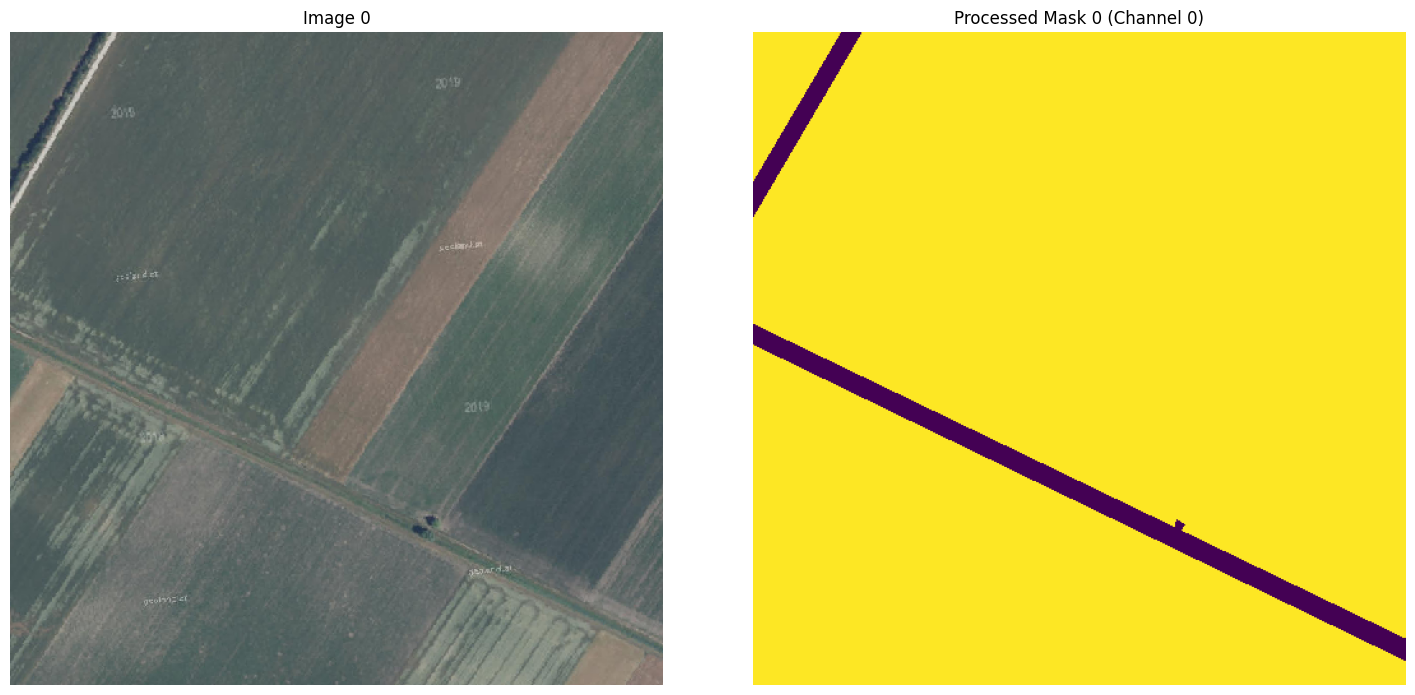


Image 1:
  Shape: (512, 512, 3), dtype: uint8
Mask 1:
  Shape: (512, 512), dtype: uint8
  Unique mask values: [0 1]


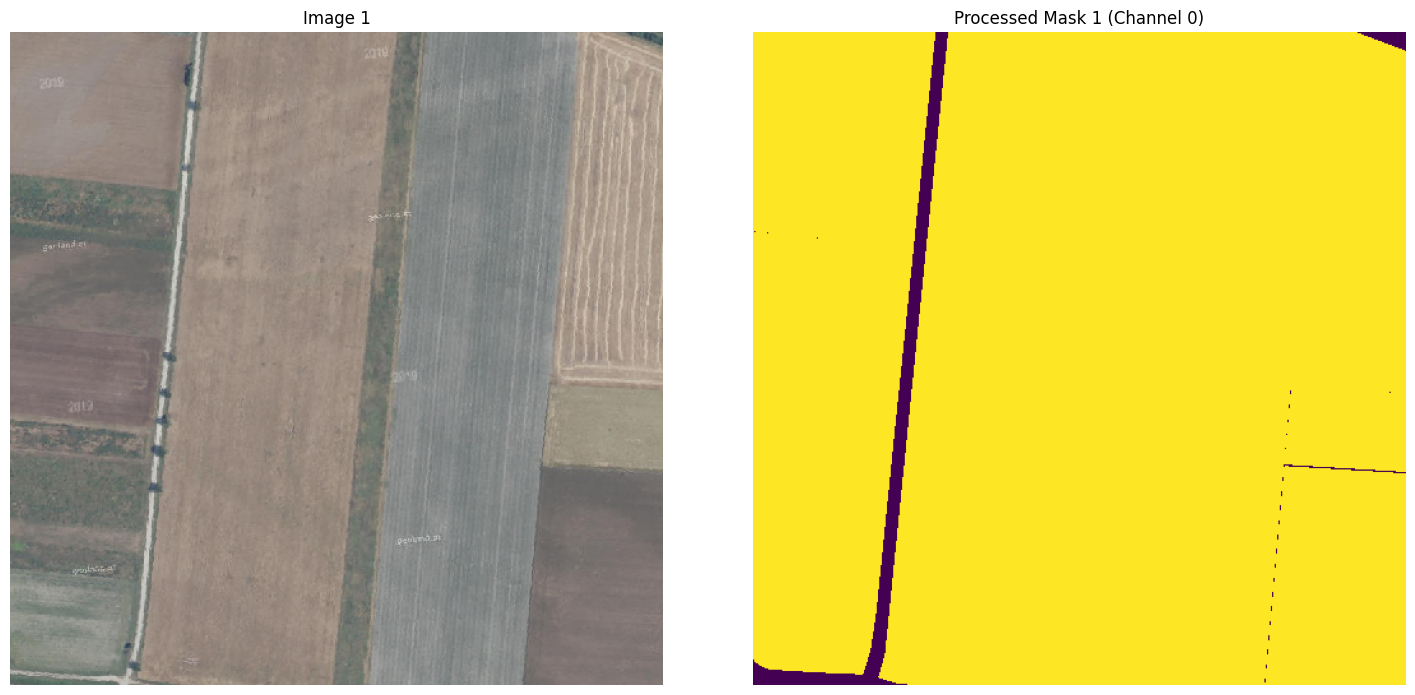


Image 2:
  Shape: (512, 512, 3), dtype: uint8
Mask 2:
  Shape: (512, 512), dtype: uint8
  Unique mask values: [0 1]


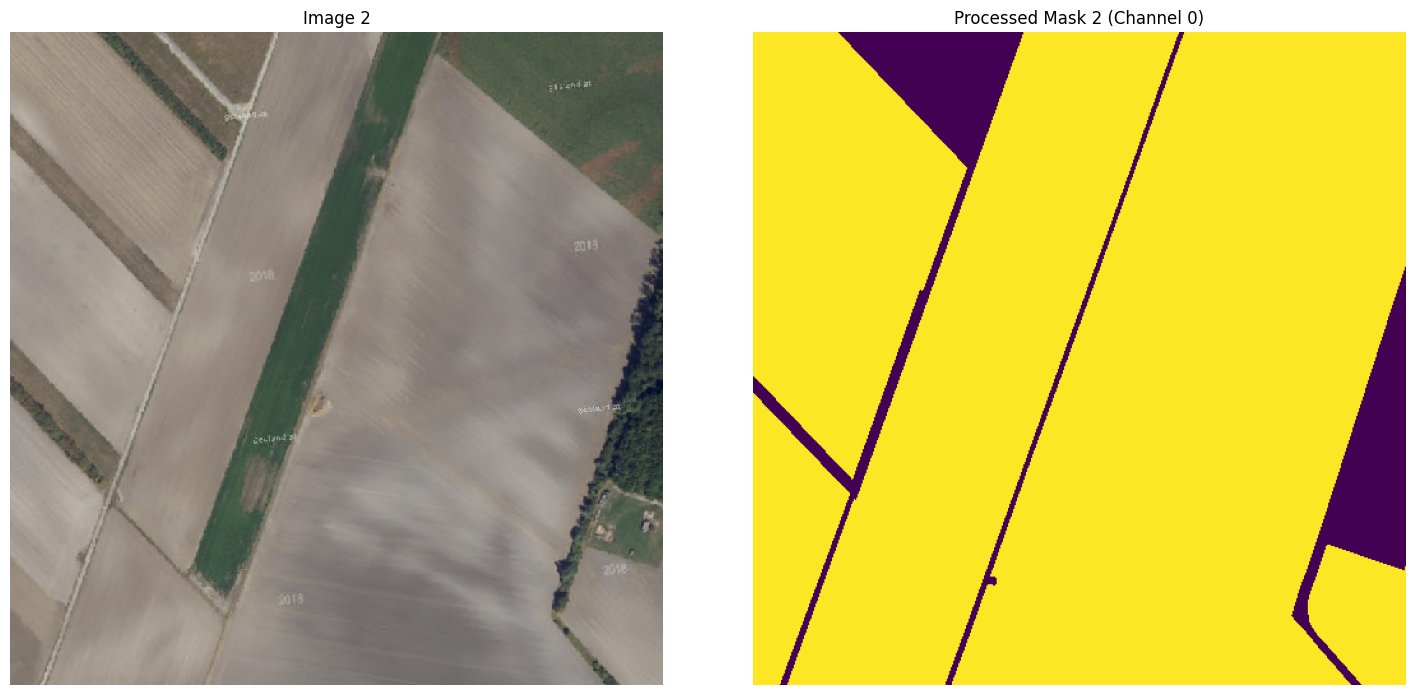


Image 3:
  Shape: (512, 512, 3), dtype: uint8
Mask 3:
  Shape: (512, 512), dtype: uint8
  Unique mask values: [0 1]


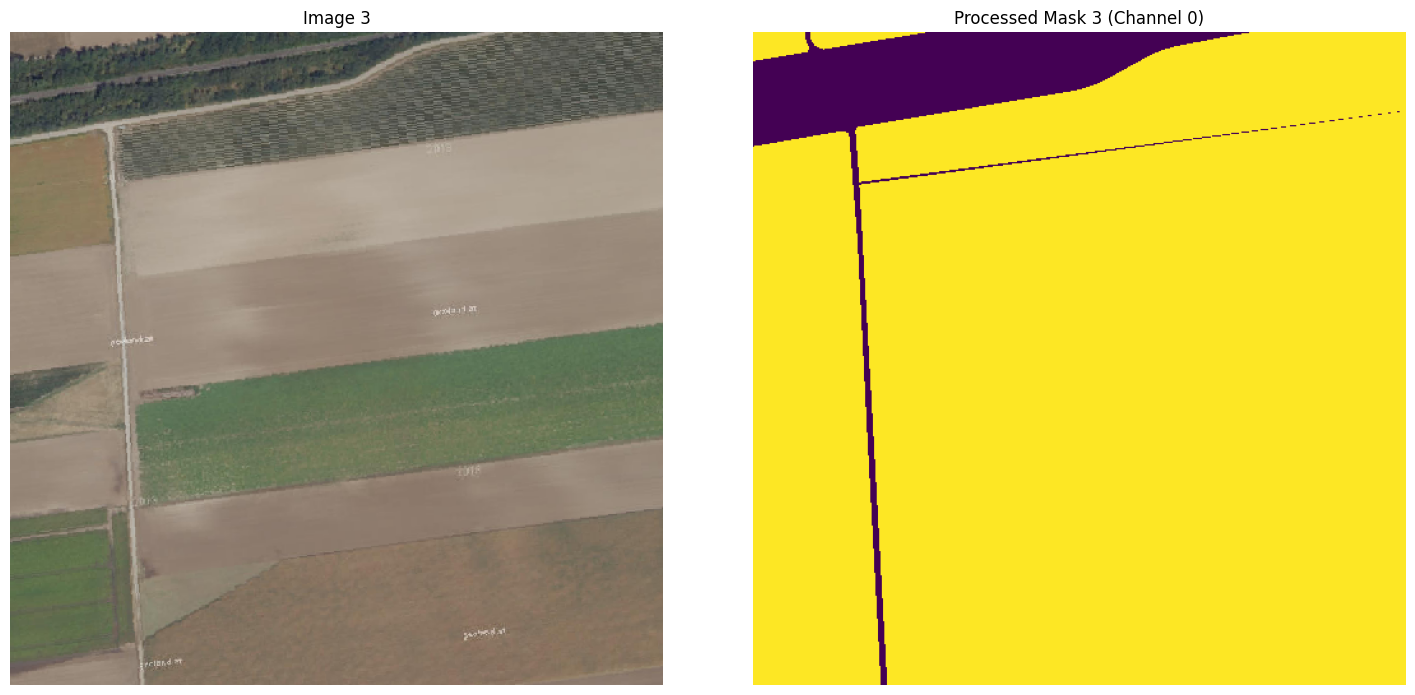


Image 4:
  Shape: (512, 512, 3), dtype: uint8
Mask 4:
  Shape: (512, 512), dtype: uint8
  Unique mask values: [0 1]


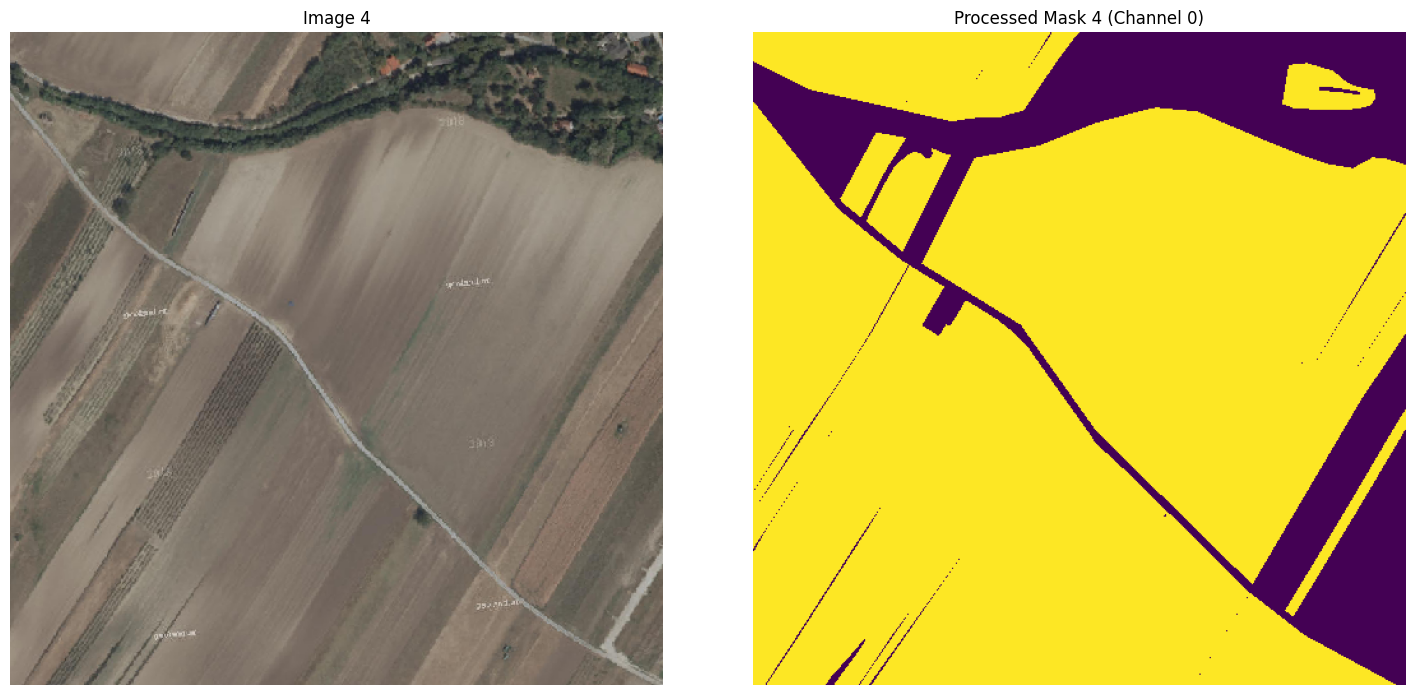

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np # Make sure numpy is imported
import tifffile # Make sure tifffile is imported for LoadAndProcessData
import imagecodecs # Make sure imagecodecs is imported

# --- Assume LoadAndProcessData function is defined correctly above ---
# def LoadAndProcessData(image_dir, mask_dir, mask_channel_index=0, mask_dtype=np.uint8):
#    ... (your function definition) ...

""" Load Train Set and view some examples """
# Define paths
IMAGE_TRAIN_PATH = './images/train/' # Use consistent variable names
MASK_TRAIN_PATH = './masks/train/'
img, mask = [], []
# Call the new function to load data into NumPy arrays
# Ensure the paths exist before calling
if os.path.exists(IMAGE_TRAIN_PATH) and os.path.exists(MASK_TRAIN_PATH):
    print("Loading data using LoadAndProcessData...")
    # The variables 'img' and 'mask' will hold lists of NumPy arrays
    img, mask = LoadAndProcessData(IMAGE_TRAIN_PATH, MASK_TRAIN_PATH, mask_channel_index=0, mask_dtype=np.uint8, limit=2432)
else:
    print(f"Error: Training directories not found at '{IMAGE_TRAIN_PATH}' or '{MASK_TRAIN_PATH}'")
    img, mask = [], [] # Assign empty lists to prevent further errors

# Check if loading was successful and data exists
if img and mask:
    # View an example of image and corresponding mask
    show_images = min(5, len(img)) # Show up to 2 images, or fewer if less data loaded
    print(f"\nDisplaying {show_images} example(s):")
    for i in range(show_images):
        # --- CORRECTED PART (AGAIN) ---
        # Directly use the NumPy arrays already loaded in the lists 'img' and 'mask'
        img_view = img[i]
        mask_view = mask[i]
        # ------------------------------

        print(f"\nImage {i}:")
        print(f"  Shape: {img_view.shape}, dtype: {img_view.dtype}")
        print(f"Mask {i}:")
        print(f"  Shape: {mask_view.shape}, dtype: {mask_view.dtype}")
        print(f"  Unique mask values: {np.unique(mask_view)}")

        # Plotting
        fig, arr = plt.subplots(1, 2, figsize=(15, 7)) # Adjusted figsize for better layout

        # Display image
        arr[0].imshow(img_view)
        arr[0].set_title(f'Image {i}')
        arr[0].axis('off') # Hide axes ticks

        # Display mask
        arr[1].imshow(mask_view, cmap='viridis') # Or cmap='gray'
        arr[1].set_title(f'Processed Mask {i} (Channel 0)')
        arr[1].axis('off') # Hide axes ticks

        plt.tight_layout() # Adjust spacing
        plt.show()
else:
    print("\nNo data loaded, skipping display.")

Prepare train dataset

Preprocessing 2432 image/mask pairs...
Finished preprocessing.

Class distribution in y_train (after resizing):
  Class 0: 97423773 pixels (61.13%)
  Class 1: 61959779 pixels (38.87%)

Processed Shapes:
X_train Shape: (2432, 256, 256, 3)
y_train shape: (2432, 256, 256, 1)

Visualizing processed example index 0:


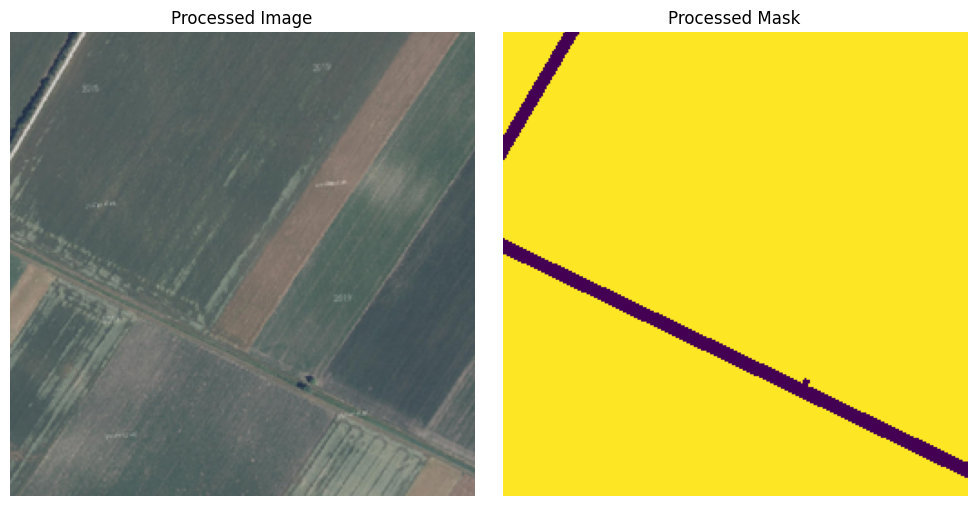

In [ ]:
# Define the desired shape (Height, Width, Channels)
target_shape_img = [256, 256, 3]
target_shape_mask = [256, 256, 1] # Semantic segmentation mask typically has 1 channel

# Ensure 'img' and 'mask' contain the NumPy arrays loaded by LoadAndProcessData
# Example: Assuming 'img' and 'mask' are already populated from the previous step
if 'img' in locals() and 'mask' in locals() and img and mask: # Check if lists exist and are not empty
    # Process data using the NEW function - notice no path1/path2 arguments
    X_train, y_train = PreprocessData(img, mask, target_shape_img, target_shape_mask)

    # --- Keep the rest of your QC/Visualization code ---
    if X_train.size > 0 and y_train.size > 0 : # Check if processing yielded data
        total_pixels = y_train.size
        unique_classes, counts = np.unique(y_train, return_counts=True)
        print("\nClass distribution in y_train (after resizing):")
        for cls, count in zip(unique_classes, counts):
            percentage = (count / total_pixels) * 100
            print(f"  Class {cls}: {count} pixels ({percentage:.2f}%)")

        # QC the shape of output
        print("\nProcessed Shapes:")
        print("X_train Shape:", X_train.shape)
        print("y_train shape:", y_train.shape)

        # Visualize the output
        image_index = 0 # Visualize the first processed image/mask
        print(f"\nVisualizing processed example index {image_index}:")
        fig, arr = plt.subplots(1, 2, figsize=(10, 5)) # Adjusted figsize

        # Display processed image (normalized, 0-1 float)
        arr[0].imshow(X_train[image_index])
        arr[0].set_title('Processed Image')
        arr[0].axis('off')

        # Display processed mask (integer class IDs)
        # Squeeze removes the last dimension (1) for displaying a 2D mask image
        arr[1].imshow(np.squeeze(y_train[image_index]), cmap='viridis') # Use a colormap
        arr[1].set_title('Processed Mask')
        arr[1].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("\nPreprocessing resulted in empty arrays. Check logs for errors.")
else:
    print("\nVariables 'img' and 'mask' not found or are empty. Run LoadAndProcessData first.")

In [ ]:
!rm -rf dataset/train

In [ ]:
from PIL import Image

output_directory = "dataset/train/a"

NUM_IMAGES = 2500 # Matches your provided X_train dimension
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 256, 256, 3
NUM_CLASSES = 2 # Example: 0: background, 1: classA, 2: classB, 3: classC
                # IMPORTANT: Update NUM_CLASSES to the actual number of unique classes in your masks

# Output directories
output_images_directory = "dataset/train/a/images"
output_masks_directory = "dataset/train/a/masks"

# Create output directories if they don't exist
os.makedirs(output_images_directory, exist_ok=True)
os.makedirs(output_masks_directory, exist_ok=True)

# --- Color Map for Masks (Optional, but recommended for better visualization) ---
# Define a color for each class ID. Ensure you have enough colors for NUM_CLASSES.
# Format: [R, G, B]
# Class 0 will usually be background, often black.
color_map = [
    [0, 0, 0],        # Class 0 (e.g., background) - Black
    [128, 0, 0],      # Class 1 - Maroon
    [0, 128, 0],      # Class 2 - Green
    [0, 0, 128],      # Class 3 - Navy
    # Add more colors if NUM_CLASSES > 4
    [128, 128, 0],    # Class 4 - Olive
    [128, 0, 128],    # Class 5 - Purple
    [0, 128, 128],    # Class 6 - Teal
    [192, 192, 192],  # Class 7 - Silver
]
# Ensure color_map has enough entries
if NUM_CLASSES > len(color_map):
    print(f"Warning: NUM_CLASSES ({NUM_CLASSES}) is greater than the number of defined colors ({len(color_map)}).")
    print("Add more colors to 'color_map' or masks for higher classes might not be colored distinctly.")
    # Extend with random colors if needed (not ideal for consistency)
    for _ in range(NUM_CLASSES - len(color_map)):
        color_map.append(list(np.random.randint(50, 200, 3))) # Avoid pure black/white for random


print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"Min value in y_train: {np.min(y_train)}, Max value in y_train: {np.max(y_train)}")
# Verify that max value in y_train is less than NUM_CLASSES
if np.max(y_train) >= NUM_CLASSES:
    print(f"CRITICAL WARNING: Max value in y_train ({np.max(y_train)}) is >= NUM_CLASSES ({NUM_CLASSES}).")
    print("This will lead to errors in color mapping or incorrect class representations.")
    print("Ensure NUM_CLASSES is correctly set to be one greater than the highest class ID in y_train.")


# Determine the number of images/masks to save
num_items_to_save = X_train.shape[0]

# Iterate over each item
for i in range(num_items_to_save):
    # --- 1. Process and Save Original Image (from X_train) ---
    image_array_x = X_train[i]

    # Data type and range conversion for X_train (if necessary, same as before)
    if image_array_x.dtype == np.float32 or image_array_x.dtype == np.float64:
        if np.min(image_array_x) >= 0 and np.max(image_array_x) <= 1:
            image_array_x = (image_array_x * 255).astype(np.uint8)
        elif np.min(image_array_x) >= -1 and np.max(image_array_x) <= 1:
            image_array_x = ((image_array_x + 1) / 2 * 255).astype(np.uint8)
        elif np.min(image_array_x) >= 0 and np.max(image_array_x) <= 255:
             image_array_x = image_array_x.astype(np.uint8)
        else:
            image_array_x = np.clip(image_array_x, 0, 255).astype(np.uint8)
    elif image_array_x.dtype != np.uint8:
        image_array_x = np.clip(image_array_x, 0, 255).astype(np.uint8)

    try:
        pil_image_x = Image.fromarray(image_array_x, 'RGB')
        filename_x = f"image_{str(i).zfill(len(str(num_items_to_save)))}.png"
        filepath_x = os.path.join(output_images_directory, filename_x)
        pil_image_x.save(filepath_x)
    except Exception as e:
        print(f"Error saving X_train image {i}: {e}")
        continue

    # --- 2. Process and Save Segmentation Mask (from y_train) ---
    current_mask_hwc1 = y_train[i] # Shape is (H, W, 1)

    # Squeeze the last dimension to get a 2D mask (H, W) of class indices
    processed_mask_2d = np.squeeze(current_mask_hwc1, axis=-1)

    # Ensure processed_mask_2d is uint8 for Pillow
    if processed_mask_2d.dtype != np.uint8:
        # Class indices should ideally be small integers.
        if np.max(processed_mask_2d) >= 256 or np.min(processed_mask_2d) < 0:
            print(f"Warning: Mask {i} class IDs ({processed_mask_2d.dtype}) are outside uint8 range after processing. Max: {np.max(processed_mask_2d)}, Min: {np.min(processed_mask_2d)}. Clipping.")
        processed_mask_2d = np.clip(processed_mask_2d, 0, 255).astype(np.uint8)
    # else: # Already uint8, no conversion needed unless already done by np.squeeze
    #    processed_mask_2d = processed_mask_2d.astype(np.uint8) # ensure just in case


    # Option A: Save mask as a color-mapped RGB image (Recommended)
    mask_rgb = np.zeros((IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
    for class_id_val in range(NUM_CLASSES): # Iterate up to NUM_CLASSES
        if class_id_val < len(color_map):
             mask_rgb[processed_mask_2d == class_id_val] = color_map[class_id_val]
        else:
            # Fallback for classes beyond defined color_map
            # This condition should ideally not be met if NUM_CLASSES and color_map are correctly set
            mask_rgb[processed_mask_2d == class_id_val] = [255, 255, 255] # White, or some other default

    try:
        pil_mask_rgb = Image.fromarray(mask_rgb, 'RGB')
        mask_filename_rgb = f"mask_color_{str(i).zfill(len(str(num_items_to_save)))}.png"
        mask_filepath_rgb = os.path.join(output_masks_directory, mask_filename_rgb)
        pil_mask_rgb.save(mask_filepath_rgb)
    except Exception as e:
        print(f"Error saving color mask for y_train item {i}: {e}")
        continue

    if (i + 1) % (num_items_to_save // 10 if num_items_to_save >= 10 else 1) == 0: # Print progress
        print(f"Saved {i+1}/{num_items_to_save} images and masks.")
        if (i + 1) == num_items_to_save or (i + 1) % (num_items_to_save // 2 if num_items_to_save >=2 else 1) == 0 : # print for first, mid and last
             print(f"  Last image: {filepath_x}")
             print(f"  Last color mask: {mask_filepath_rgb}")
             print(f"  Last gray mask: {mask_filepath_gray}")


print(f"\nFinished saving {num_items_to_save} images to: {output_images_directory}")
print(f"Finished saving {num_items_to_save} masks to: {output_masks_directory}")

X_train shape: (2432, 256, 256, 3), dtype: float32
y_train shape: (2432, 256, 256, 1), dtype: int32
Min value in y_train: 0, Max value in y_train: 1
Saved 243/2432 images and masks.
Saved 486/2432 images and masks.
Saved 729/2432 images and masks.
Saved 972/2432 images and masks.
Saved 1215/2432 images and masks.
Saved 1458/2432 images and masks.
Saved 1701/2432 images and masks.
Saved 1944/2432 images and masks.
Saved 2187/2432 images and masks.
Saved 2430/2432 images and masks.

Finished saving 2432 images to: dataset/train/a/images
Finished saving 2432 masks to: dataset/train/a/masks


In [ ]:
!ls -la dataset/train/a/images | head

total 314688
drwxr-xr-x 2 root root  73728 May 11 17:44 .
drwxr-xr-x 4 root root   4096 May 11 17:43 ..
-rw-r--r-- 1 root root  98689 May 11 17:43 image_0000.png
-rw-r--r-- 1 root root  89147 May 11 17:43 image_0001.png
-rw-r--r-- 1 root root  85430 May 11 17:43 image_0002.png
-rw-r--r-- 1 root root  80871 May 11 17:43 image_0003.png
-rw-r--r-- 1 root root  97764 May 11 17:43 image_0004.png
-rw-r--r-- 1 root root 118045 May 11 17:43 image_0005.png
-rw-r--r-- 1 root root 116416 May 11 17:43 image_0006.png


In [ ]:
!tar -czf dataseta.v2.tar.gz ./dataset

In [ ]:
!ls -la

total 6545596
drwxr-xr-x 1 root root       4096 May 11 17:39 .
drwxr-xr-x 1 root root       4096 May 11 17:10 ..
drwxr-xr-x 4 root root       4096 May  8 13:38 .config
drwxr-xr-x 3 root root       4096 May 11 17:43 dataset
-rw-r--r-- 1 root root  332723447 May 11 17:26 dataseta.tar.gz
-rw-r--r-- 1 root root  320580182 May 11 17:47 dataseta.v2.tar.gz
drwx------ 7 root root       4096 May 11 17:13 drive
drwxrwxr-x 5 root root       4096 Sep 30  2022 images
drwxrwxr-x 5 root root       4096 Sep 30  2022 masks
-rw------- 1 root root 6049340023 May 11 17:15 orthos.zip
drwxr-xr-x 1 root root       4096 May  8 13:38 sample_data


In [ ]:
!cp dataseta.v2.tar.gz /content/drive/MyDrive/dissertation/datasets/dataseta.v2.tar.gz